# IMAGE PROCESSING WITH PYTHON

In [24]:
'''
What is image processing?
-	performing operations on images and videos to:
1)	Enhance an image
2)	Extract useful information
3)	Analyze it and make decisions


Applications of Image Processing:
1)	Medical Image Analysis
2)	Artificial Intelligence
3)	Image restoration and enhancement
4)	Geospatial Intelligence
5)	Surveillance
6)	Robotic vision
7)	Automotive safety

Purpose of Image Processing:
1)	Visualization:
-	Objects that are not visible
2)	Image sharpening and restoration
-	A better image
3)	Image retrieval
-	Seek for the image of interest
4)	Measurement of pattern
-	Measures various objects
5)	Image recognition
-	Distinguish objects in an image


•	A digital image is a matrix of pixels elements.
•	These pixels contain the information about color and intensity.

'''

'\nWhat is image processing?\n-\tperforming operations on images and videos to:\n1)\tEnhance an image\n2)\tExtract useful information\n3)\tAnalyze it and make decisions\n\n\nApplications of Image Processing:\n1)\tMedical Image Analysis\n2)\tArtificial Intelligence\n3)\tImage restoration and enhancement\n4)\tGeospatial Intelligence\n5)\tSurveillance\n6)\tRobotic vision\n7)\tAutomotive safety\n\nPurpose of Image Processing:\n1)\tVisualization:\n-\tObjects that are not visible\n2)\tImage sharpening and restoration\n-\tA better image\n3)\tImage retrieval\n-\tSeek for the image of interest\n4)\tMeasurement of pattern\n-\tMeasures various objects\n5)\tImage recognition\n-\tDistinguish objects in an image\n\n\n•\tA digital image is a matrix of pixels elements.\n•\tThese pixels contain the information about color and intensity.\n\n'

In [68]:
import cv2
import numpy as np
from skimage import color
import matplotlib.pyplot as plt
from skimage import data

In [69]:
# show image function
def show_image(image, title='image', cmap_type='gray'):
    plt.imshow(image, cmap = cmap_type)
    plt.title( title)
    plt.axis('off')
    plt.show()

In [70]:
# Importing images from scimages
coffee_image = data.coffee()
# coins_image = data.coins()
# rocket_image = data.rocket()

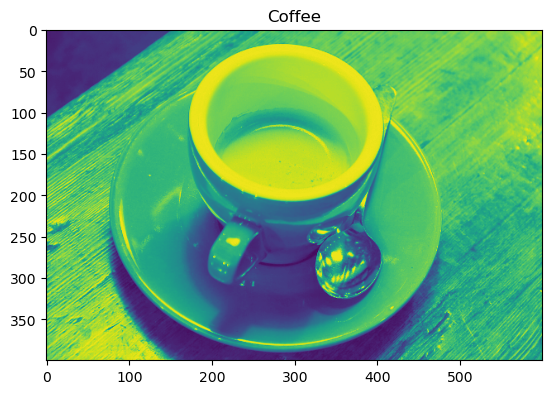

In [30]:
# Colors with NumPy

red = coffee_image[ :, :, 0]
plt.imshow(red)
plt.title('Coffee')
# plt.axis('off')
plt.show()


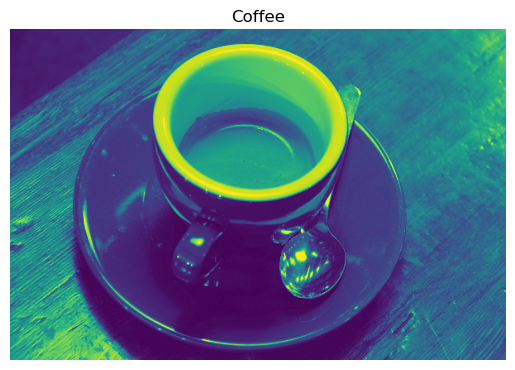

In [31]:
green = coffee_image[ :, :, 1]
plt.imshow(green)
plt.title('Coffee')
plt.axis('off')
plt.show()

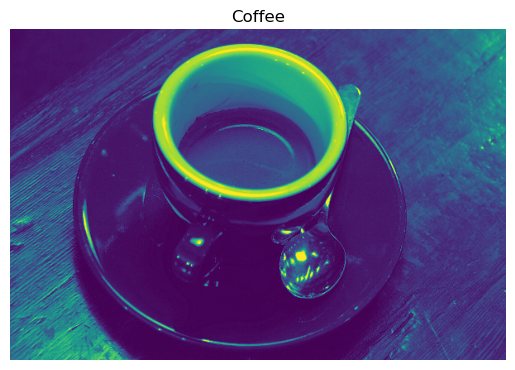

In [32]:
blue = coffee_image[ :, :, 2]
plt.imshow(blue)
plt.title('Coffee')
plt.axis('off')
plt.show()

In [33]:
coffee_image.shape

(400, 600, 3)

In [34]:
coffee_image.size

720000

# Flipping image vertically

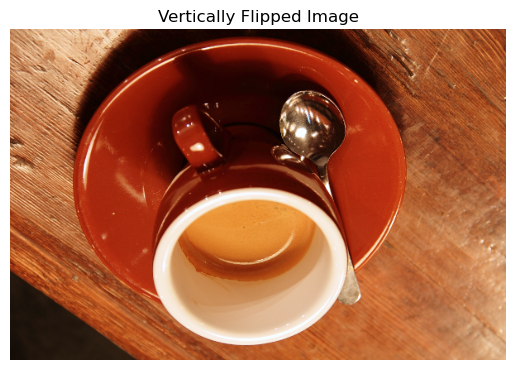

In [35]:
vertically_flipped = np.flipud(coffee_image)
show_image(vertically_flipped, 'Vertically Flipped Image')

# Flipping image horizontally

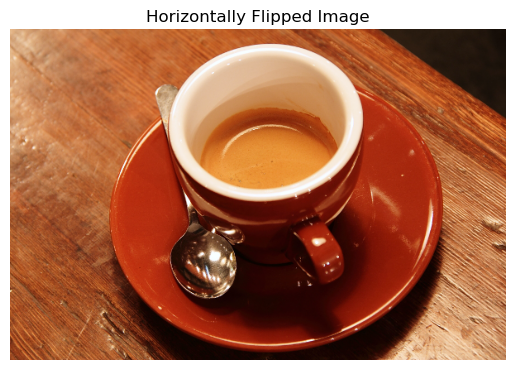

In [36]:
horizontally_flipped = np.fliplr(coffee_image)

show_image(horizontally_flipped, 'Horizontally Flipped Image')

# Histogram of an image

In [37]:
'''
It is graphical representation of amount of pixels of each intensity value
'''
# black image : more pixels intensity near 0 
# bright image : more pixels intensity near 255

'\nIt is graphical representation of amount of pixels of each intensity value\n'

## Applications of histogram

In [38]:
'''
1) Analysis
2) Thresholding
3) Brightness and contrast
4) Equalize and image
'''

'\n1) Analysis\n2) Thresholding\n3) Brightness and contrast\n4) Equalize and image\n'

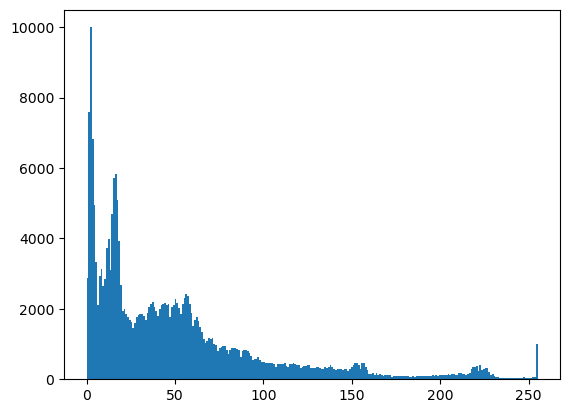

In [39]:
red = coffee_image[ :, :, 2]
plt.hist(red.ravel(), bins=256)
plt.show()

# Thresholding

In [40]:
# Thresholding means partitioning an image into foreground and background, by making it black and white

# This can be done by setting each pixel to : 
'''
    - 255 (white) if pixel > thresh value
    - 0 (Black) if pixel < thresh value
'''   
# Thresholding is simplest method of image segmentation
# Thresholding let us isolate objects:
#     - for Object detection, face detection, etc.


# To threshold any rgb image we must convert it to grayscale image

'\n    - 255 (white) if pixel > thresh value\n    - 0 (Black) if pixel < thresh value\n'

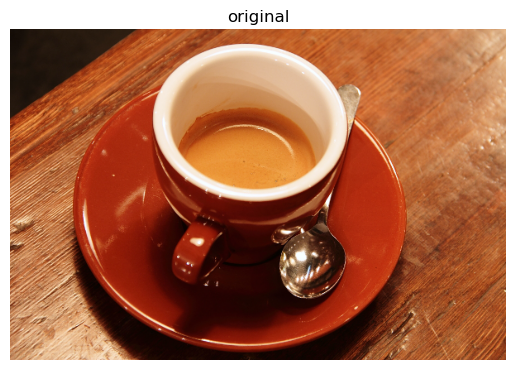

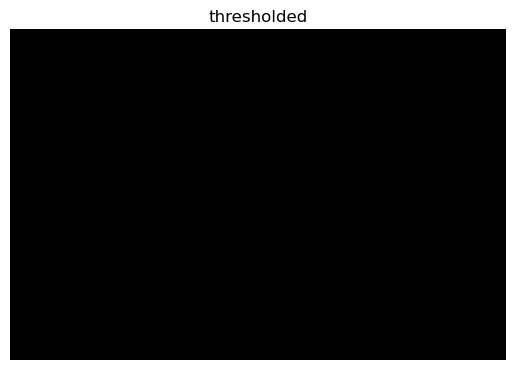

In [41]:
coffee_image = data.coffee()

grayscale = color.rgb2gray(coffee_image)
# thresh = threshold_otsu(grayscale)

thresh = 127

binary = grayscale > thresh

show_image(coffee_image, 'original')
show_image(binary, 'thresholded')

# Inverted thresholding

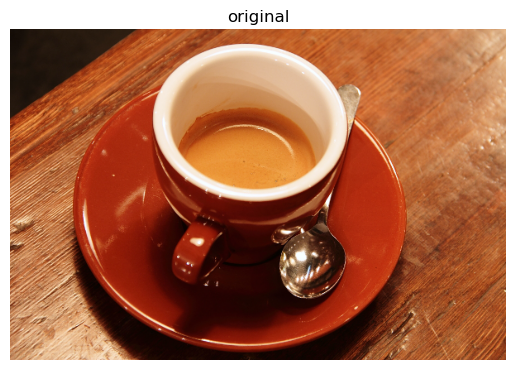

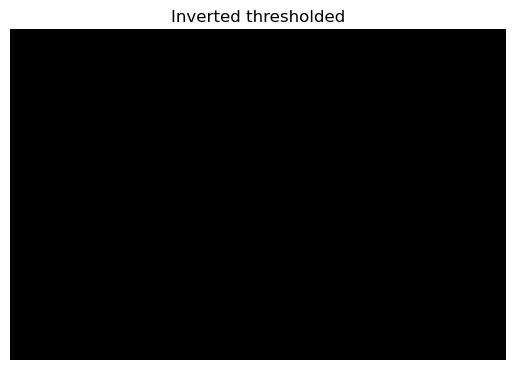

In [42]:
thresh= 127
inverted_binary = grayscale <= thresh
show_image(coffee_image, 'original')
show_image(inverted_binary, 'Inverted thresholded')

# Thresholding categories

In [43]:
'''
1) Global or histogram based : Good for uniform backgrounds
2) Local or adaptive : for uneven background elimination
'''

'\n1) Global or histogram based : Good for uniform backgrounds\n2) Local or adaptive : for uneven background elimination\n'

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


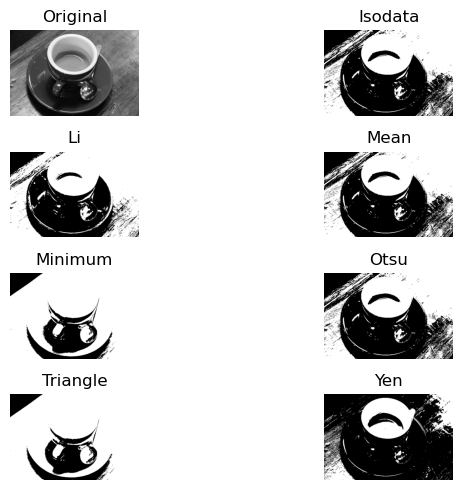

In [44]:
# More thresholding algorithms:
    
from skimage.filters import try_all_threshold

# obtain all the resulting images
fig, ax = try_all_threshold(grayscale)  # add (,verbose = False) after grayscale to hide info in output

plt.show(fig, ax)

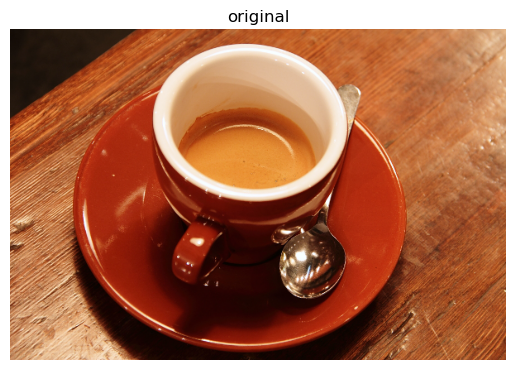

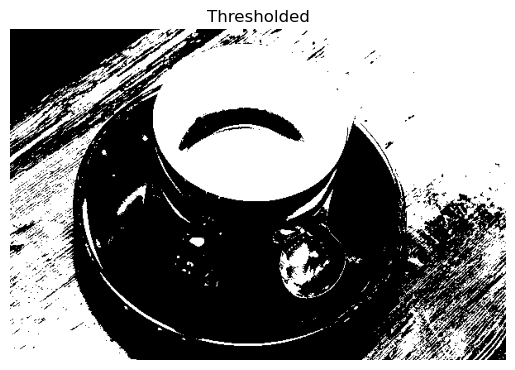

In [45]:
# optimal thresh value - - global - - uniform background

# import the otsu threshold function

from skimage.filters import threshold_otsu

# obtain the optimal threshold value
thresh = threshold_otsu(grayscale)

# apply thresholding to the image
binary_global = grayscale > thresh

show_image(coffee_image, 'original')
show_image(binary_global, 'Thresholded')



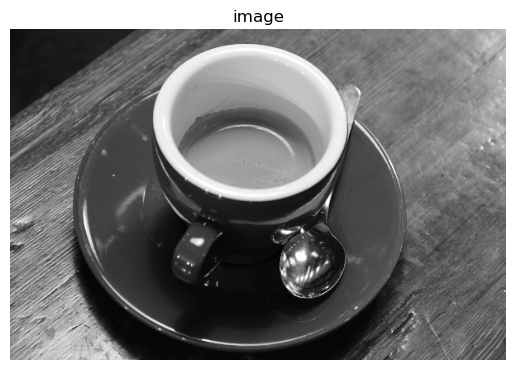

In [46]:
# import the local threshold function
from skimage.filters import threshold_local
# set the block size to 35
block_size = 35
#obtain the optimal local thresholding
local_thresh = threshold_local(grayscale, block_size, offset=10)
# apply local thresholding and obtain binary image
binary_local = grayscale > local_thresh

show_image(grayscale)